In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import os
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv(os.listdir()[0])
data

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [28]:
categories = 'Analyst Consultant Manager Partner C-Level CEO'.split()
data.Position.str.contains('Analyst')
cond_list = [
    data.Position.str.contains(x)
    for x in categories
]
data['Job_Type'] = np.select(cond_list, categories, 'Other')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
 3   Job_Type  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [30]:
data.describe(include='all').round(2)

Position  Level      Salary Job_Type
count                 10  10.00       10.00       10
unique                10    NaN         NaN        6
top     Business Analyst    NaN         NaN  Manager
freq                   1    NaN         NaN        3
mean                 NaN   5.50   249500.00      NaN
std                  NaN   3.03   299373.88      NaN
min                  NaN   1.00    45000.00      NaN
25%                  NaN   3.25    65000.00      NaN
50%                  NaN   5.50   130000.00      NaN
75%                  NaN   7.75   275000.00      NaN
max                  NaN  10.00  1000000.00      NaN

In [31]:
print('Duplicates: {}'.format(data.duplicated().sum()))

Duplicates: 0


array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

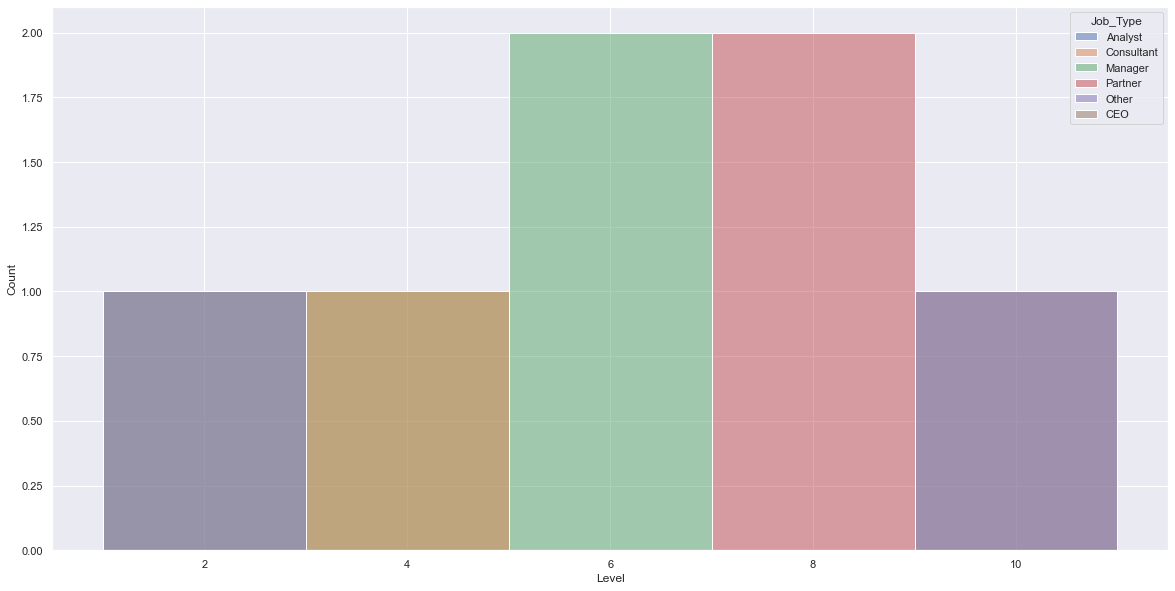

In [117]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.histplot(data = data, x = 'Level', hue = 'Job_Type', bins = np.arange(1, 12, 2))
plt.show()

In [101]:
scaler = StandardScaler()
X = pd.get_dummies(data.drop(['Salary', 'Job_Type'], axis = 1))
y = scaler.fit_transform(data.Salary.values.reshape(-1,1))
X['Level'] = scaler.fit_transform(X['Level'].values.reshape(-1, 1))
# X = data.drop(['Salary', 'Position', 'Job_Type'], axis = 1)
# Y = data.Salary

In [104]:
svr = SVR()
# (cache_size = 50,
#             coef0 = 0,
#             degree =  2,
#             gamma = 'auto',
#             shrinking = False,
#             tol = 0.001,
#             verbose = False)

svr.fit(X, y)
# params = dict(
# degree = np.arange(1,6), 
# gamma = ['scale', 'auto'], 
# coef0 = np.arange(0,3), 
# tol = [0.001, 0.01, 0.1], shrinking = [True, False],
# cache_size = list(range(0,200, 50)), 
# verbose = [True, False],)
# cross_val = GridSearchCV(svr, param_grid= params, cv = 5).fit(X, y)


c:\Users\Barry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [105]:
svr.score(X, y)

0.7502200399816593

In [108]:
svr.feature_names_in_

array(['Level', 'Position_Business Analyst', 'Position_C-level',
       'Position_CEO', 'Position_Country Manager',
       'Position_Junior Consultant', 'Position_Manager',
       'Position_Partner', 'Position_Region Manager',
       'Position_Senior Consultant', 'Position_Senior Partner'],
      dtype=object)

In [9]:
try:
   x = pd.DataFrame()
except:
    from itertools import product
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

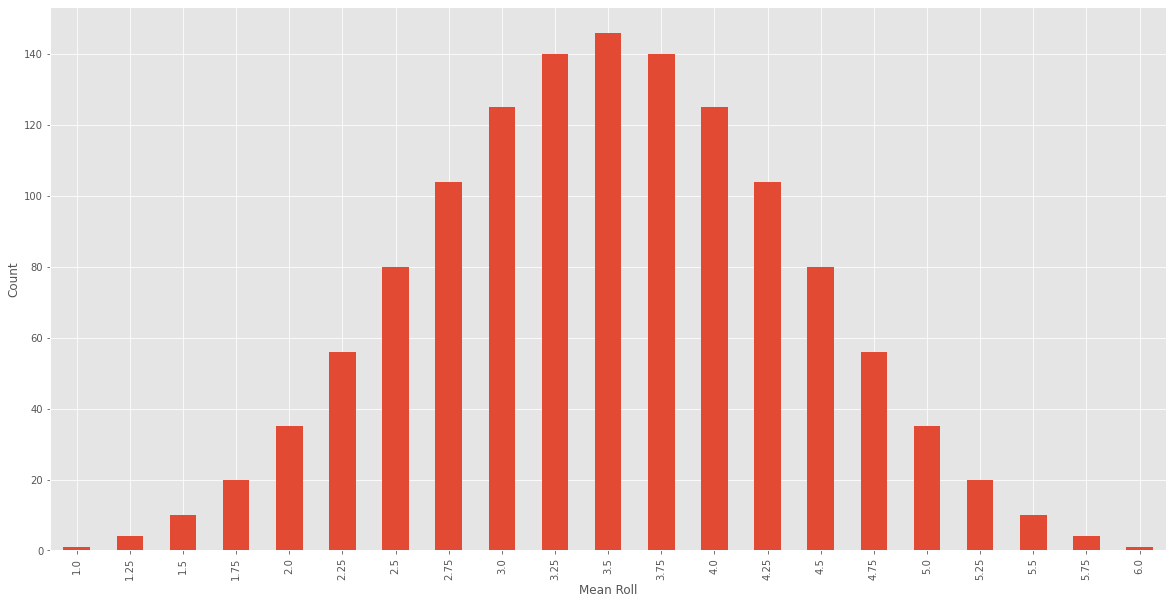

In [13]:
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())
plt.style.use('ggplot')
df = expand_grid({
   f'die{x}' : np.arange(1, 7)
   for x in range(1, 5)
})
df['mean_roll'] = (df.sum(axis=1) / df.shape[1]).astype('category')
df.mean_roll.value_counts(sort = False)\
    .plot(kind = 'bar', 
          xlabel=  'Mean Roll', ylabel = 'Count', 
          figsize=(20, 10),
          )
plt.show()